## GROUP NAME:
* FATI iDEAS

##### DETAILS OF MEMBERS 

1.GILBERT KWAME QUAINOO-  SB/FIN/20/0082 <br>
2.PIOUS DANSO-  SB/FIN/20/0011  <br>
3.SINBAD AFRANE -  SB/FIN/20/0100 <br>
4.FATI BUABENG -  SB/FIN/20/0038 <br>
5.BRIGHT BENEDICT OWODOW -  SB/FIN/20/0024 <br>
6.PATRICK ACKAH-  SB/FIN/20/0043 <br>

* ### About
* Alamo Group is a global leader in the design and manufacture of high quality agricultural equipment for farms and ranches <br> and infrastructure maintenance equipment for governmental and industrial markets.<br>
* ### Brief History
* Founded in 1969, Alamo Group is a leader in the design, manufacture, distribution and service of high quality equipment <br>for infrastructure maintenance, agriculture and other applications.

In [1]:
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

#### ALAMO GROUP COMPANY DATA WAS EXTRACTED FROM YAHOO FINANCE.


In [2]:
start = '2018-01-01'
end = '2024-01-01'
df_1 = yfin.download('ALG', start,end)
df_1.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,112.959999,114.050003,111.769997,112.309998,109.020889,64100
2018-01-03,112.250000,113.010002,110.800003,111.470001,108.205505,71800
2018-01-04,111.949997,112.339996,111.190002,111.470001,108.205505,54000
2018-01-05,111.800003,112.230003,109.860001,111.839996,108.564667,44300
2018-01-08,110.190002,114.500000,110.190002,113.459999,110.137230,76100


In [3]:
assign_1 = df_1.to_csv('assignment_1.csv')

#### THE DATA IS SAVED AND CAN BE RUN WITHOUT NETWORK

In [4]:
assign= pd.read_csv('assignment.csv',index_col=0,parse_dates=True)
assign.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-10,111.440002,113.239998,110.779999,111.849998,108.574379,41800
2018-01-11,112.440002,114.000000,111.250000,113.620003,110.292557,85100
2018-01-12,113.949997,115.669998,112.599998,114.980003,111.720894,45800
2018-01-16,115.589996,116.720001,113.169998,114.430000,111.186455,73200
2018-01-17,114.910004,115.220001,113.629997,115.220001,111.954071,28300


In [5]:
assign= pd.DataFrame(assign['Adj Close'])

In [6]:
assign['Adj Close'].describe()

count    1503.000000
mean      127.481021
std        30.934556
min        72.075745
25%       100.050076
50%       123.932594
75%       149.633018
max       212.973434
Name: Adj Close, dtype: float64

####  THE ALG AJUSTED CLOSE PRICES <br>
 SHOW A POSITIVE TREND IN THE STOCK PERFORMANCE DURING THE PERIOD

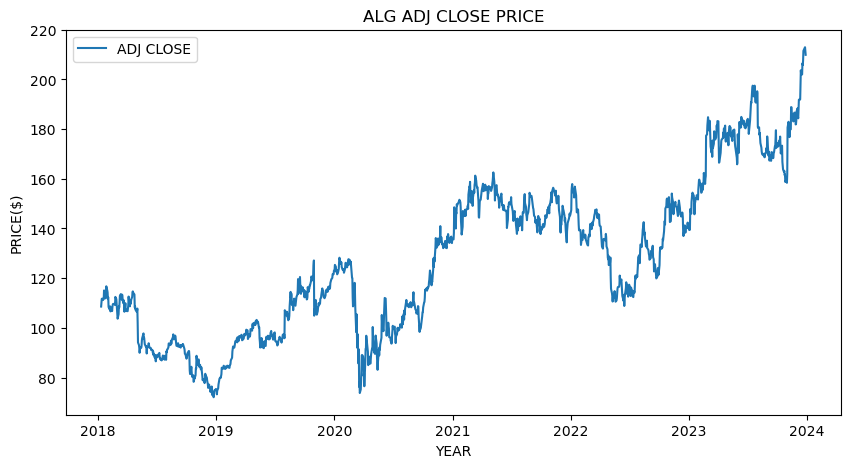

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.ylabel('PRICE($)')
plt.title('ALG ADJ CLOSE PRICE')
plt.plot(assign,label ='ADJ CLOSE',linestyle = '-')
plt.legend();

#### THE RETURN OF THE ADJUSTED CLOSE IS CALCULATED USING DIFFERENCE OF THE LOG

In [11]:
Return = np.log(assign['Adj Close']).diff().dropna()

In [12]:
Return.describe()

count    1502.000000
mean        0.000439
std         0.021291
min        -0.192143
25%        -0.010275
50%         0.000903
75%         0.011077
max         0.121339
Name: Adj Close, dtype: float64

####  THE RETURNS ALSO DEMONSTRATES THE RISE AND FALL IN THE RETURNS

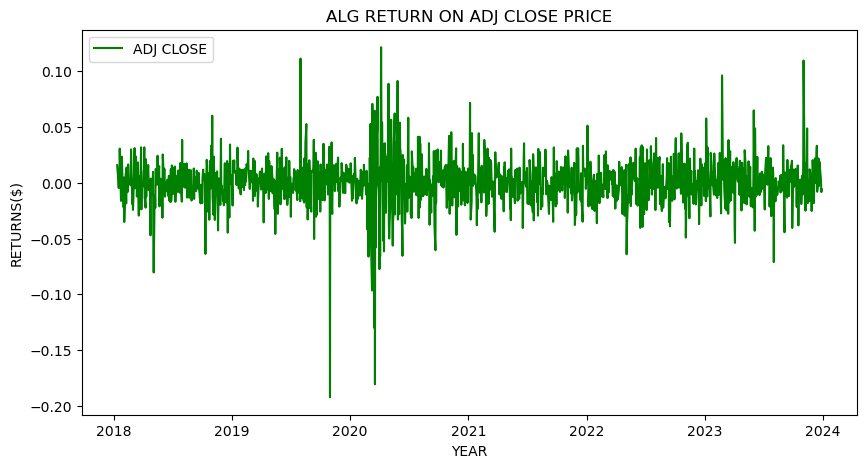

In [13]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.ylabel('RETURNS($)')
plt.title('ALG RETURN ON ADJ CLOSE PRICE')
plt.plot(Return,label ='ADJ CLOSE',color = 'g',linestyle = '-')
plt.legend(loc= 'upper left');

### CHECKING FOR THE:
* SKEWNESS <br>
* MEAN <br>
* STD.V <br>
* KURTOSIS OF THE RETURNS

In [14]:
mean_value =round(Return.mean(),4)
standv= round(Return.std(),4)
skewness= round(Return.skew(),4)
kurt= round(Return.kurtosis(),4)

print(f'THE MEAN OF THE RETURN IS: {mean_value}')
print(f'THE STANDADARD DEVIATION OF THE RETURN IS: {standv}')
print(f'THE SKEWNESS OF THE RETURN IS: {skewness}')
print(f'THE KURTOSIS OF THE RETURN IS: {kurt}')

THE MEAN OF THE RETURN IS: 0.0004
THE STANDADARD DEVIATION OF THE RETURN IS: 0.0213
THE SKEWNESS OF THE RETURN IS: -0.7811
THE KURTOSIS OF THE RETURN IS: 11.4643


### THE STATIONARITY OF THE RETURNS <br>
* A stationary data has the property that the mean, variance and autocorrelation structure <br>


In [18]:
result = adfuller(Return)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -14.676867767837011
p-value: 3.201497943433283e-27
Critical Values: {'1%': -3.434731647915545, '5%': -2.8634752174058944, '10%': -2.5678002869095424}


###  The ADF test is used to determine whether a time series is stationary or not

* Ho =  non stationary <br>
* Ha = stationary <br>

If the p-value is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude <br>that the time series is stationary. Otherwise, we fail to reject the null hypothesis and conclude that the time series is non-stationary.<br>

Based on the p-value of 3.20e-27, we can reject the null hypothesis and conclude that the time series is stationary. <br>Therefore, the time series has constant statistical properties over time, such as constant mean and variance .<br>

### HISTOGRAM OF THE RETURNS THAT SHOWS:
* THE  MEAN <br>
* THE DENSITY <br>
* THE STANDARD DEVIATION <br>

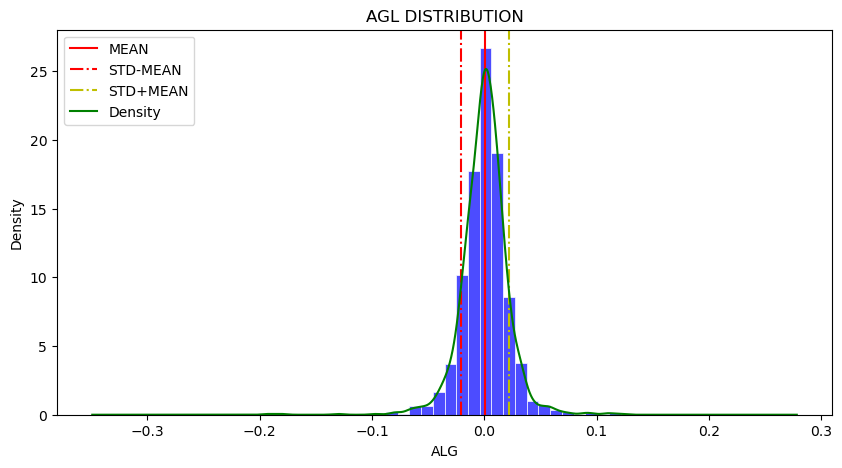

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel('ALG')
plt.title('AGL DISTRIBUTION')
plt.axvline(mean_value,color= 'r', linestyle= 'solid',label = 'MEAN')
plt.axvline(mean_value-standv,color = 'r',linestyle = 'dashdot',label = 'STD-MEAN')
plt.axvline(mean_value+standv,color = 'y',linestyle = 'dashdot',label = 'STD+MEAN')
plt.hist(Return,bins= 30,density= True, linewidth = 0.7,edgecolor= 'white',color= 'b',alpha = 0.7)
Return.plot.density(color= 'g',linestyle= 'solid',label= 'Density')
plt.legend(loc = 'upper left');

* Mean ± Standard Deviation with density in the histogram provides a visual and quantitative way to understand the concentration of data around the mean and the spread of values in a dataset.